🔧 Step 1: Load Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


📋 Step 2: Basic Dataset Overview

In [3]:
df.info()
df.describe()
df.isnull().sum()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(891, 12)

📊 Step 3: Visualize Missing Data

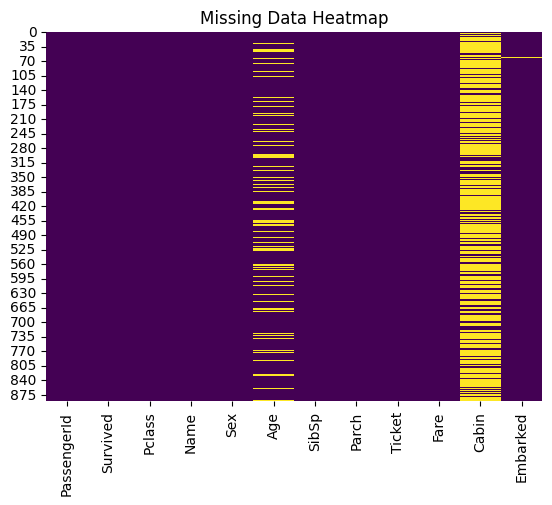

In [4]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()


*Insight:*

Cabin is missing for most rows; Age has some missing values too.

📈 Step 4: Data Distributions (Histograms)

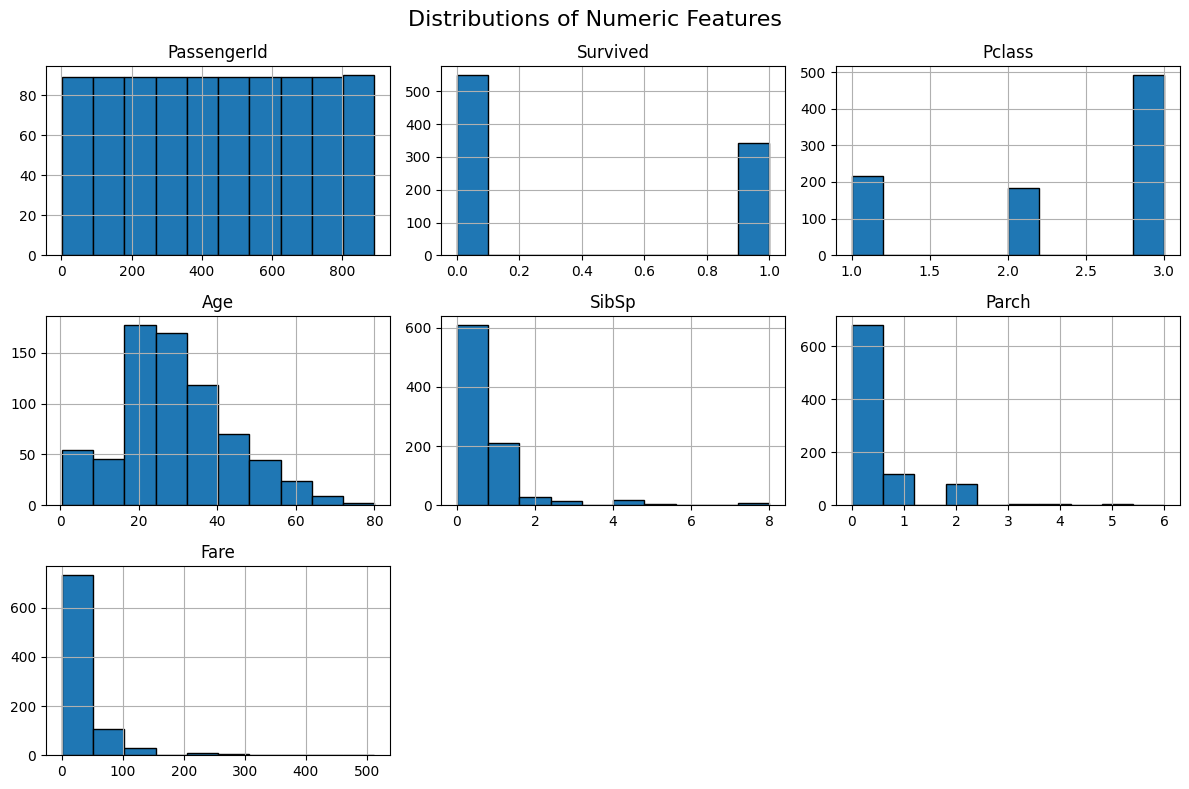

In [5]:
df.hist(figsize=(12, 8), edgecolor='black')
plt.suptitle("Distributions of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


*Insight:*

Age and Fare are right-skewed.

Most passengers paid low fares.

📦 Step 5: Box Plots (Outlier Detection)

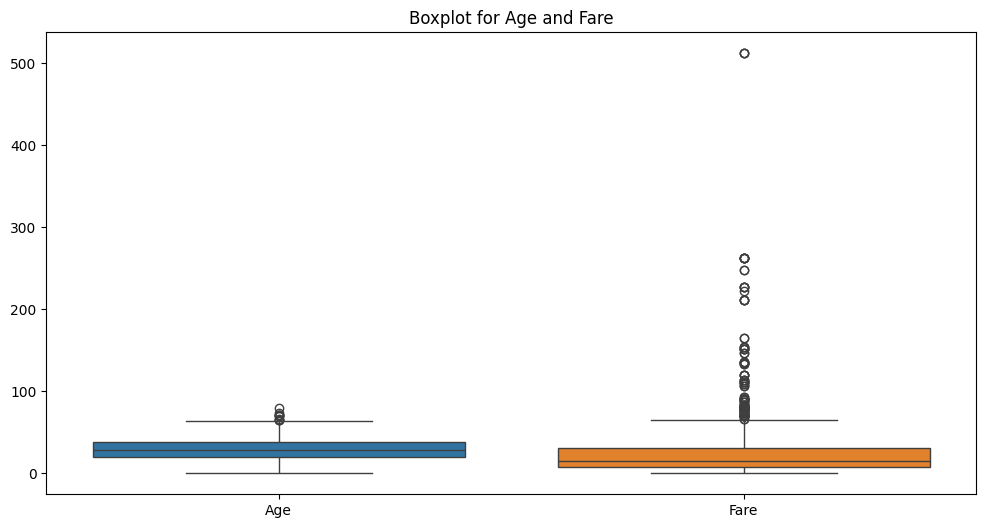

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplot for Age and Fare")
plt.show()


*Insight:*

Fare has significant outliers (some passengers paid very high fares).

Age also has a few outliers.

📊 Step 6: Countplots for Categorical Columns

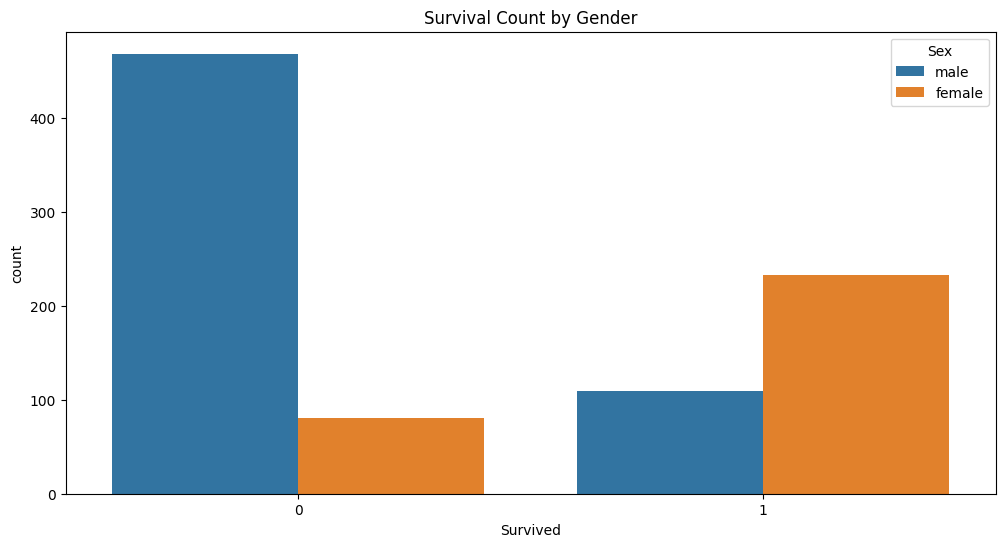

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title("Survival Count by Gender")
plt.show()

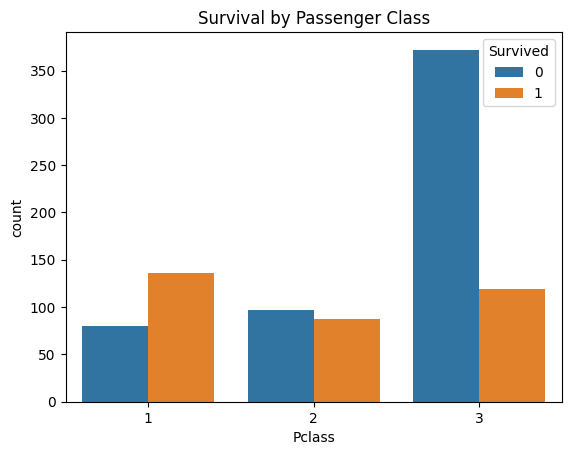

In [8]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.show()


*Insight:*

Females survived more than males.

Higher-class passengers had better survival rates.

🔍 Step 7: Heatmap (Correlation Matrix)
python
Copy code


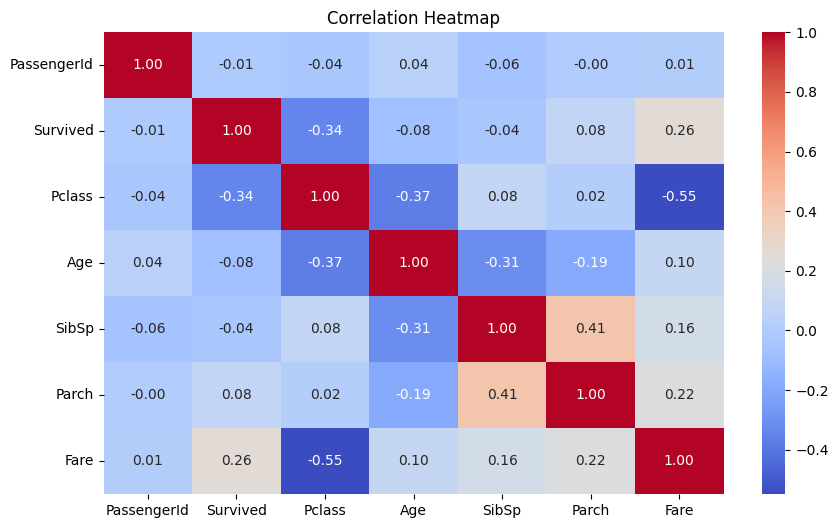

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


*Insight:*

Pclass is negatively correlated with Survived.

Fare has a positive correlation with Survived.

🧹 Step 8: Handle Missing Values (Example)

In [10]:
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop Cabin due to too many missing values
df.drop('Cabin', axis=1, inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


/tmp/ipython-input-10-553844006.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-10-553844006.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

✨ Pairplot for Relationship Analysis

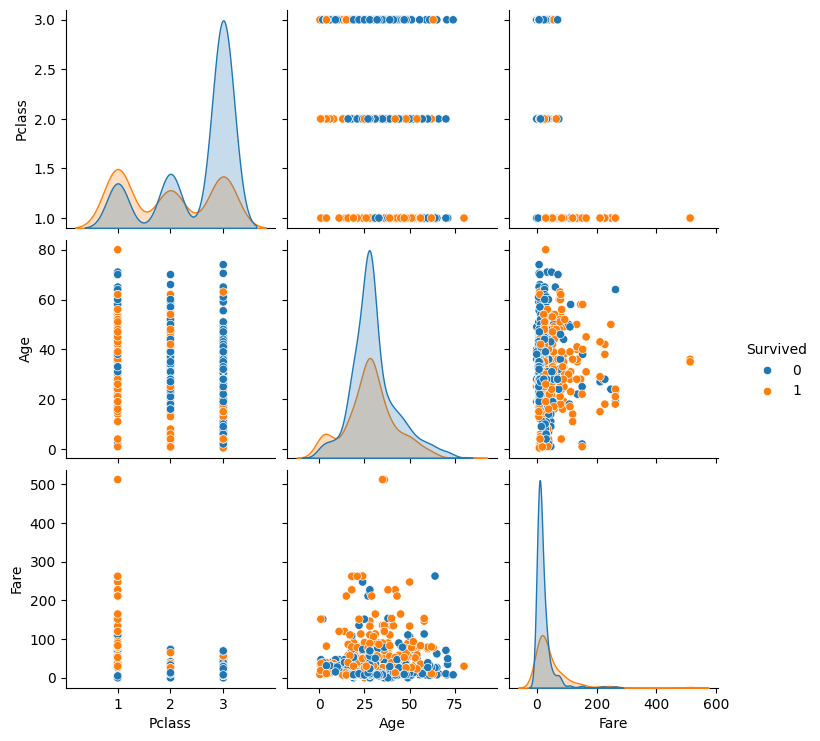

In [14]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.show()


**✅ Final Summary / Conclusion:**

This Exploratory Data Analysis on the Titanic dataset revealed important patterns in the data.

Age and Fare showed skewed distributions and outliers. Missing data was mainly in Cabin and Age columns.

Survival rates were strongly associated with gender and passenger class.

Visualizations like histograms, boxplots, and heatmaps helped uncover these insights and prepare the data for further modeling.